In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [65]:
# Adding some styles to plots
sns.set_style("whitegrid")
# Set the figure Size
sns.set(rc={'figure.figsize':(20, 16)})
# Set the palette for the plot
custom_palette = ["#ff006e", "#8338ec", "#3a86ff", "#ef233c", "#d90429", "#fb5607"]  # Custom colors
sns.set_palette(custom_palette)
sns.set_context("talk", font_scale = 0.5, rc={"grid.linewidth": 0.6})


In [66]:
# Loading the dataset
dataset = pd.read_csv("datasets/medical_insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
# Find number of samples
dataset.shape

(2772, 7)

In [68]:
# Or find number of samples this way
print(len(dataset))

2772


In [69]:
# Check for missing values in dataset 
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [70]:
# Check for datatypes of each column
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [71]:
# Check for duplicates in dataset
dataset.duplicated().sum()

1435

In [ ]:
# Overall basic statistics
dataset.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [73]:
# One hot encoding for categorial variables
dataset = pd.get_dummies(dataset, columns=['sex'])
dataset.head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,True,False
1,18,33.770,1,no,southeast,1725.55230,False,True
2,28,33.000,3,no,southeast,4449.46200,False,True
3,33,22.705,0,no,northwest,21984.47061,False,True
4,32,28.880,0,no,northwest,3866.85520,False,True


In [74]:
# find the number of unique values in a certain column
dataset['region'].nunique()

4

In [19]:
# find the unique values of a certain column
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [75]:
# Drop useless columns
dataset.drop(columns=['smoker', 'region'], inplace=True)

In [76]:
# Matrix of correlation
dataset.corr()

,age,bmi,children,charges,sex_female,sex_male
age,1.000000,0.113048,0.037574,0.298624,0.026046,-0.026046
bmi,0.113048,1.000000,-0.001492,0.199846,-0.042924,0.042924
children,0.037574,-0.001492,1.000000,0.066442,-0.016020,0.016020
charges,0.298624,0.199846,0.066442,1.000000,-0.062837,0.062837
sex_female,0.026046,-0.042924,-0.016020,-0.062837,1.000000,-1.000000
sex_male,-0.026046,0.042924,0.016020,0.062837,-1.000000,1.000000


In [77]:
# scale dataframe values
dataset['charges'] = dataset['charges']/1000.0
dataset.head()

,age,bmi,children,charges,sex_female,sex_male
0,19,27.900,0,16.884924,True,False
1,18,33.770,1,1.725552,False,True
2,28,33.000,3,4.449462,False,True
3,33,22.705,0,21.984471,False,True
4,32,28.880,0,3.866855,False,True


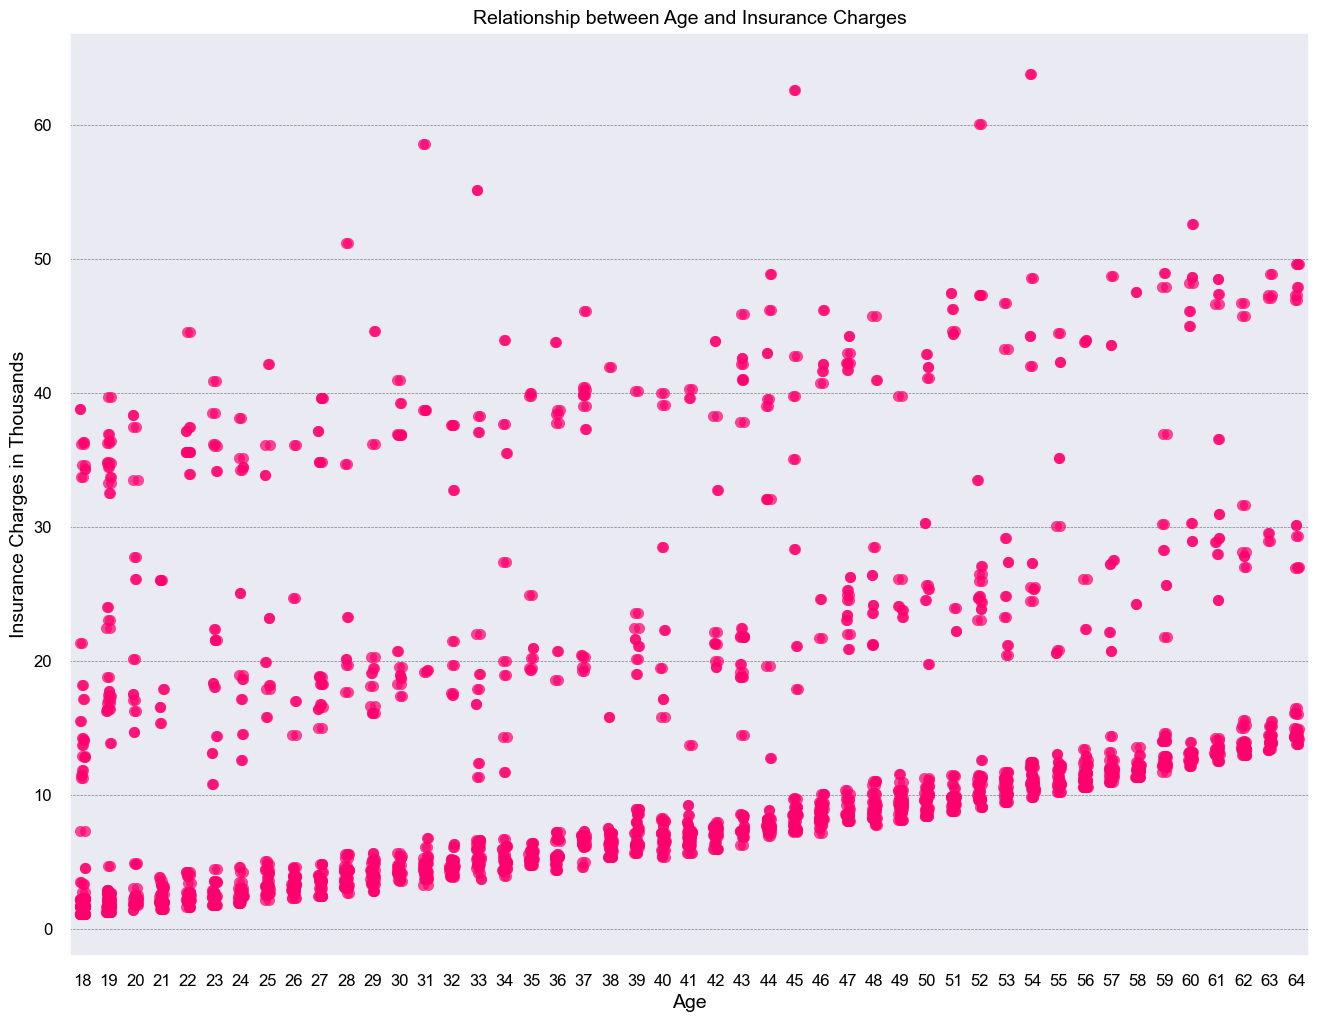

In [23]:
plt.xlabel("Age", fontsize=14, color='black')
plt.ylabel("Insurance Charges in Thousands", fontsize=14, color='black')
plt.title("Relationship between Age and Insurance Charges", fontsize=14, color='black')
# Customize the tick labels
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
# Customize the grid color
plt.grid(color='gray', linestyle='--', linewidth=0.5)
sns.stripplot(x=dataset['age'], y=dataset["charges"],dodge=True, size=8, alpha=0.7, jitter=True)
plt.show()

In [78]:
# First thing our loss function the mean squared error
def mean_squared_error(m, b, dataset, labels):
    total_error = 0
    for i in range(len(dataset)):
        x = dataset.iloc[i]['age']
        y = labels.iloc[i]
        total_error += (y - (m * x + b))**2
    return total_error / float(len(dataset))
    

In [79]:
# Gradient descent : looking for leat possible loss
def gradient_descent(m_now, b_now, dataset, labels, learning_rate):
    m_gradient = 0
    b_gradient = 0
    n = len(dataset)
    
    for i in range(n):
        x = dataset.iloc[i]['age']
        y = labels.iloc[i]
        m_gradient += -(2/n) * x * (y-(m_now * x + b_now))
        b_gradient += -(2/n) * (y-(m_now * x + b_now))
    
    # which direction we have to move away from 
    # (m & b are coordinates of the gradient vector)
    m = m_now - m_gradient * learning_rate
    b = b_now - b_gradient * learning_rate
    return m, b

In [80]:
# Calculate the training loss
def test_model(m, b, dataset_test, labels_test):
    test_loss = mean_squared_error(m, b, dataset_test, labels_test)
    return test_loss

In [81]:
# split dataset to train set and test set
labels = dataset['charges']
x_train, x_test, y_train, y_test = train_test_split(dataset,labels, test_size=0.1, shuffle=True, random_state=42)

In [82]:
labels

0       16.884924
1        1.725552
2        4.449462
3       21.984471
4        3.866855
          ...    
2767     8.569862
2768     2.020177
2769    16.450895
2770    21.595382
2771     9.850432
Name: charges, Length: 2772, dtype: float64

In [83]:
m, b = 0, 0
learning_rate = 0.0005
epochs = 1000
training_loss_history = []
testing_loss_history = []

for i in range(epochs):
    m, b = gradient_descent(m, b, x_train, y_train, learning_rate)
    current_train_loss = mean_squared_error(m, b, x_train, y_train)
    current_test_loss = mean_squared_error(m, b, x_test, y_test)
    training_loss_history.append(current_train_loss)
    testing_loss_history.append(current_test_loss)
    print(f'Epoch: {i}\tTraining Loss: {current_train_loss}\tTesting Loss: {current_test_loss}')

Epoch: 0	Training Loss: 238.6689883027954	Testing Loss: 220.65907724869993
Epoch: 1	Training Loss: 192.01332162446087	Testing Loss: 186.06959685745593
Epoch: 2	Training Loss: 166.62640798385235	Testing Loss: 154.86592318717206
Epoch: 3	Training Loss: 152.81246901411018	Testing Loss: 147.0207695951332
Epoch: 4	Training Loss: 145.2957371641581	Testing Loss: 136.0146515034918
Epoch: 5	Training Loss: 141.2055070403853	Testing Loss: 134.99555270368418
Epoch: 6	Training Loss: 138.97974063085346	Testing Loss: 130.77523549793545
Epoch: 7	Training Loss: 137.76848560113527	Testing Loss: 131.18283205206166
Epoch: 8	Training Loss: 137.10925706592025	Testing Loss: 129.4100510192718
Epoch: 9	Training Loss: 136.75040294958058	Testing Loss: 129.91667467277463
Epoch: 10	Training Loss: 136.55499171298655	Testing Loss: 129.10709487962797
Epoch: 11	Training Loss: 136.44851474593696	Testing Loss: 129.46708358590712
Epoch: 12	Training Loss: 136.39042965016563	Testing Loss: 129.07247633044247
Epoch: 13	Train

In [84]:
print(f'm: {m}, b:{b}')

m: 0.32030805153176517, b:0.38848010576295444


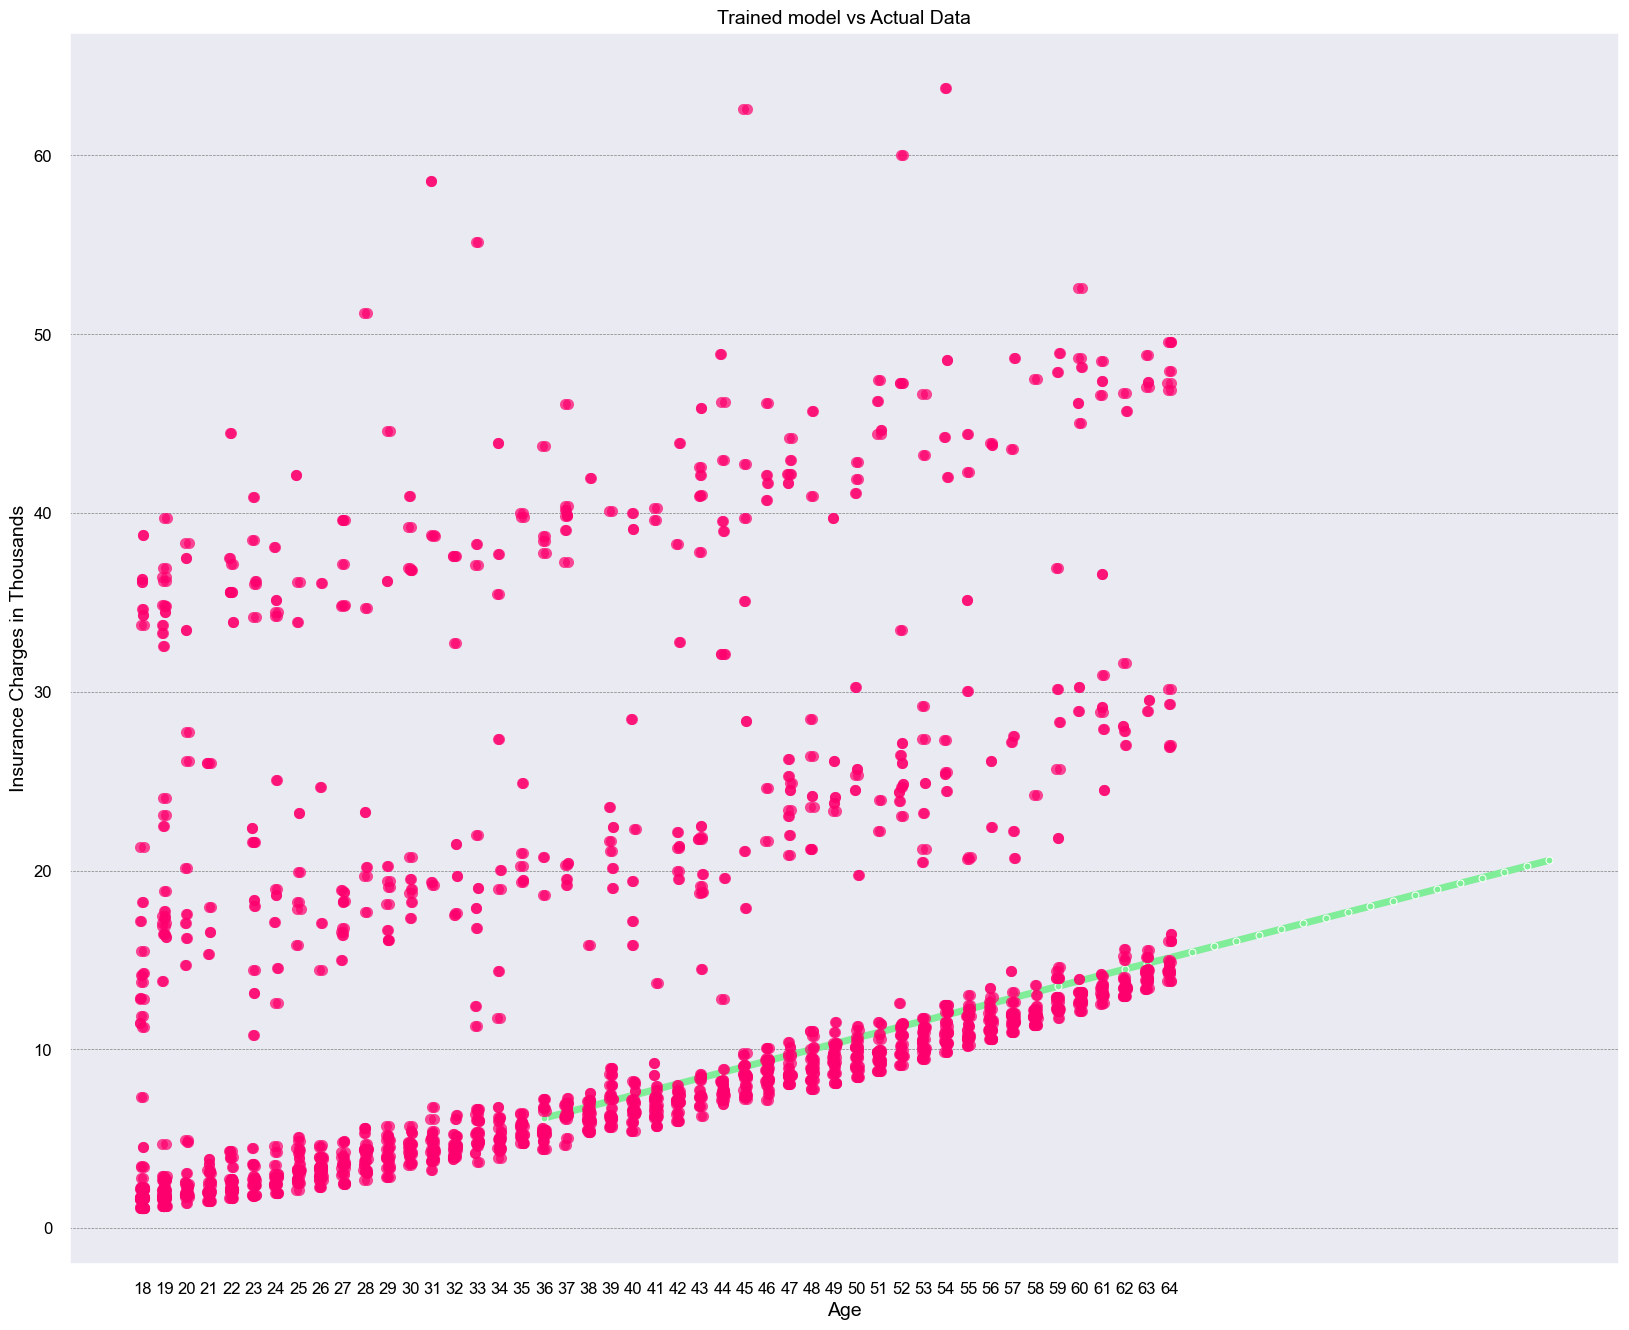

In [85]:
# Plotting the model vs actual data
plt.xlabel('Age', fontsize=14, color='black')
plt.ylabel('Insurance Charges in Thousands', fontsize=14, color='black')
plt.title('Trained model vs Actual Data', fontsize=14, color='black')
# Customize the tick labels 
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
# Customize the grid color
plt.grid(color='gray', linestyle='--', linewidth=0.5)
sns.stripplot(x=dataset['age'], y=labels, dodge=True, size=8, alpha=0.7, jitter=True)
# plotting the model
x = list(range(18,64))
y =[m * value + b for value in x]
sns.lineplot(x=x, y=y, marker='o', markersize=5, linestyle='-', linewidth=5, color='#80ed99')
# show the plot
plt.show()

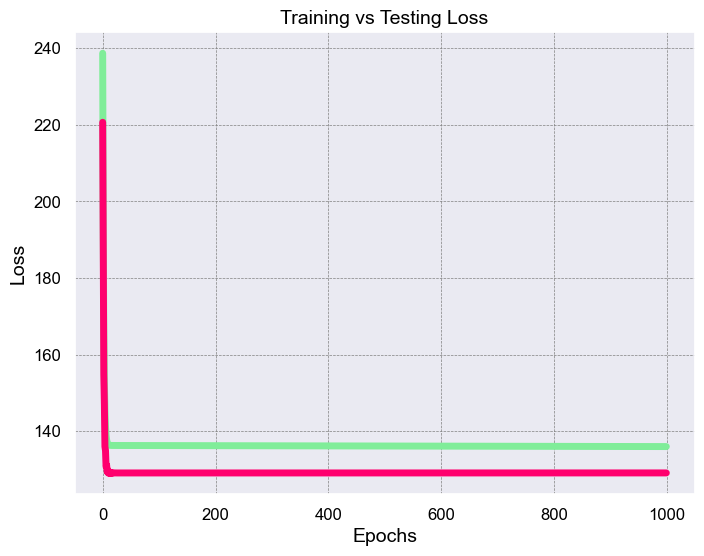

In [87]:
# Plot the training loss vs the test loss
x_ticks = list(range(0, 1000))
sns.set(rc={'figure.figsize':(8, 6)})
plt.xlabel('Epochs', fontsize=14, color='black')
plt.ylabel('Loss', fontsize=14, color='black')
plt.title('Training vs Testing Loss', fontsize=14, color='black')
# Customize the tick labels 
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
# Customize the grid color
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# plotting the training loss
sns.lineplot(x=x_ticks, y=training_loss_history, linestyle='-', linewidth=5, color='#80ed99')
# plotting the testing loss
sns.lineplot(x=x_ticks, y=testing_loss_history, linestyle='-', linewidth=5, color='#ff006e')
# show the plot
plt.show()

In [88]:
# Test the model
predictions = [m * age +b for age in x_test['age']]
# Create a dataframe to store the data
results = pd.DataFrame({
    'age' : x_test['age'],
    'The actual insurance charges in Thousands' : y_test,
    'The predicted insurance charge in Thousands' : predictions
})

In [89]:
results.head(20)

,age,The actual insurance charges in Thousands,The predicted insurance charge in Thousands
1106,49,8.988159,16.083575
1321,62,28.101333,20.247579
2313,57,12.032326,18.646039
2274,22,1.682597,7.435257
1432,18,3.393356,6.154025
2240,49,24.106913,16.083575
965,35,4.746344,11.599262
2626,52,47.269854,17.044499
2134,47,8.556907,15.442959
2296,22,2.639043,7.435257
